In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
TEXTAREA_TRAIN_FOLDER = "../data/registrationtext/train/"
RC_TRAIN_FOLDER = "../data/registrationcard/train/"

## Train Dataset Analysis

In [6]:
symbol_df = pd.read_csv(f"{TEXTAREA_TRAIN_FOLDER}character_from_text.csv")

In [7]:
symbol_df.head()

,image_name,xmin,ymin,xmax,ymax,class_id
0,1.jpg,0,0,13,15,46
1,1.jpg,14,0,26,15,52
2,1.jpg,27,1,36,16,46
3,1.jpg,37,1,46,16,47
4,1.jpg,47,1,52,16,2


In [8]:
symbol_df[symbol_df['image_name'] == '214140.jpg']

,image_name,xmin,ymin,xmax,ymax,class_id
969042,214140.jpg,0,0,41,33,18
969043,214140.jpg,42,0,61,33,15
969044,214140.jpg,62,0,75,33,28
969045,214140.jpg,76,0,97,33,22
969046,214140.jpg,98,0,111,33,15
969047,214140.jpg,112,0,139,33,29
969048,214140.jpg,140,1,159,34,15
969049,214140.jpg,160,1,175,34,24


In [9]:
symbol_df.shape

(969050, 6)

In [10]:
def get_frequency(df, target_col = 'class_id'):
    _df = df.copy()
    target_count = _df[target_col].value_counts().reset_index()
    x = target_count['index'].values
    y = target_count['class_id'].values
    
    return (x,y)
(x_symbol, y_symbol) = get_frequency(symbol_df)

In [11]:
with open("../data/registrationtext/label/character_label_decoder.json") as file:
    decoder = json.load(file)
    
def decodeLabel(labels):
    decoded_labels = []
    for label in labels:
        string_label = str(label)
        if string_label in decoder:
            decoded_labels.append(decoder[string_label])
    return decoded_labels

In [12]:
y_symbol

array([117134,  64891,  57148,  52296,  36781,  35510,  29272,  29265,
        26182,  25847,  23551,  22826,  21820,  21078,  20337,  17252,
        17156,  16773,  16586,  15936,  15334,  15246,  15147,  14459,
        14105,  14099,  13451,  13053,  12844,  12524,  11675,  10925,
        10741,  10733,  10465,   9907,   9310,   7049,   6087,   5972,
         5780,   5714,   5551,   5468,   5438,   5268,   4894,   4641,
         4514,   3918,   3291,   2892,   2181,   2163,   2101,   2056,
          692,    567,    485,    396,    165,     57,     20,     19,
           12], dtype=int64)

In [13]:
len(y_symbol)

65

In [14]:
print(decoder)

{'1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9', '10': '0', '11': 'a', '12': 'b', '13': 'c', '14': 'd', '15': 'e', '16': 'f', '17': 'g', '18': 'h', '19': 'i', '20': 'j', '21': 'k', '22': 'l', '23': 'm', '24': 'n', '25': 'o', '26': 'p', '27': 'q', '28': 'r', '29': 's', '30': 't', '31': 'u', '32': 'v', '33': 'w', '34': 'x', '35': 'y', '36': 'z', '37': 'A', '38': 'B', '39': 'C', '40': 'D', '41': 'E', '42': 'F', '43': 'G', '44': 'H', '45': 'I', '46': 'J', '47': 'K', '48': 'L', '49': 'M', '50': 'N', '51': 'O', '52': 'P', '53': 'Q', '54': 'R', '55': 'S', '56': 'T', '57': 'U', '58': 'V', '59': 'W', '60': 'X', '61': 'Y', '62': 'Z', '63': '-', '64': ':', '65': '/'}


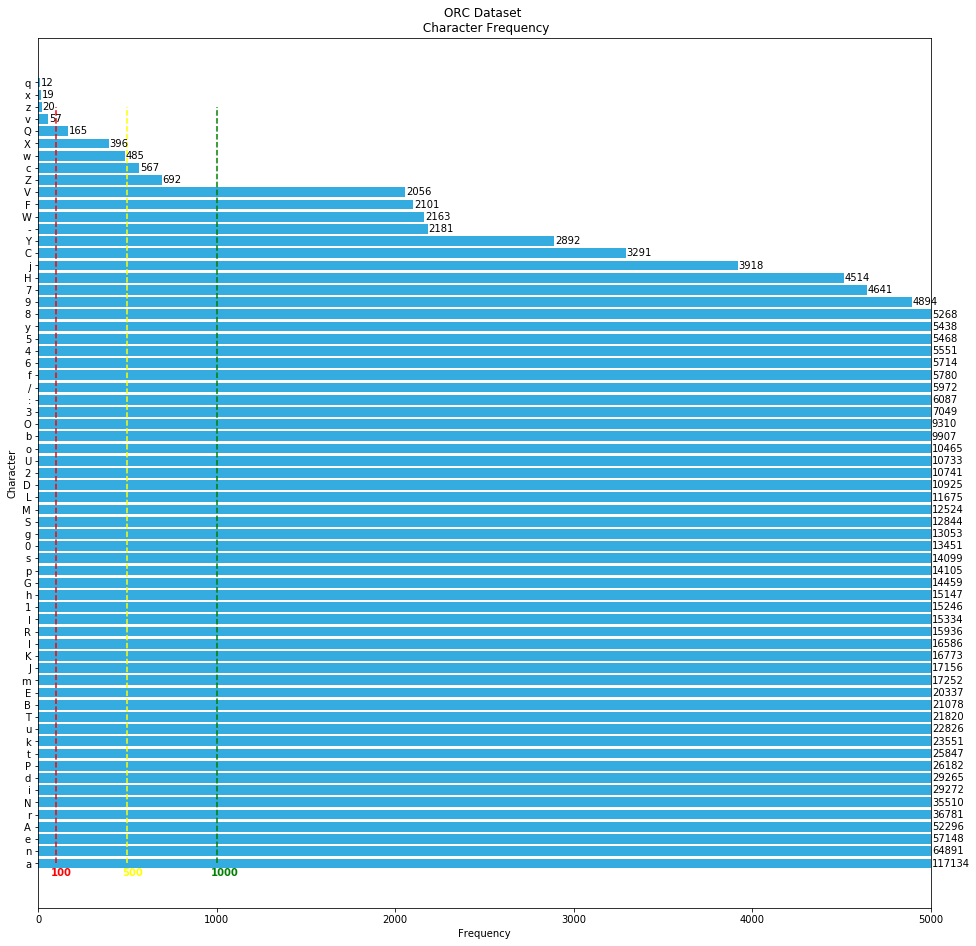

In [15]:
def plotCharFrequency(x,y, color = "#34ace0"):
    plt.figure(figsize=(16,16))
    XLIM = 5000
    plt.title("ORC Dataset \n Character Frequency")
    plt.barh(decodeLabel(x), y, align='center', color = color)
    plt.yticks(decodeLabel(x))
    plt.ylabel("Character")
    plt.xlabel("Frequency")
    
    plt.xlim(0,XLIM)

    plt.vlines(100, 0, 62, colors="r", linestyles="dashed")
    plt.text(70, -1, "100",color="red", fontweight='bold')

    plt.vlines(500, 0, 62, colors="yellow", linestyles="dashed")
    plt.text(470, -1, "500",color="yellow", fontweight='bold')

    plt.vlines(1000, 0, 62, colors="green", linestyles="dashed")
    plt.text(970, -1, "1000",color="green", fontweight='bold')

    for i, v in enumerate(y):
        v_point = v
        if v_point > XLIM:
            v_point = XLIM
        plt.text(v_point + 5, i -0.25, str(v), color='black')

    plt.show()
plotCharFrequency(x_symbol,y_symbol)

## Random Sampling

### Character from text

Shape before sampling (969050, 6)
Shape after sampling (975637, 6)


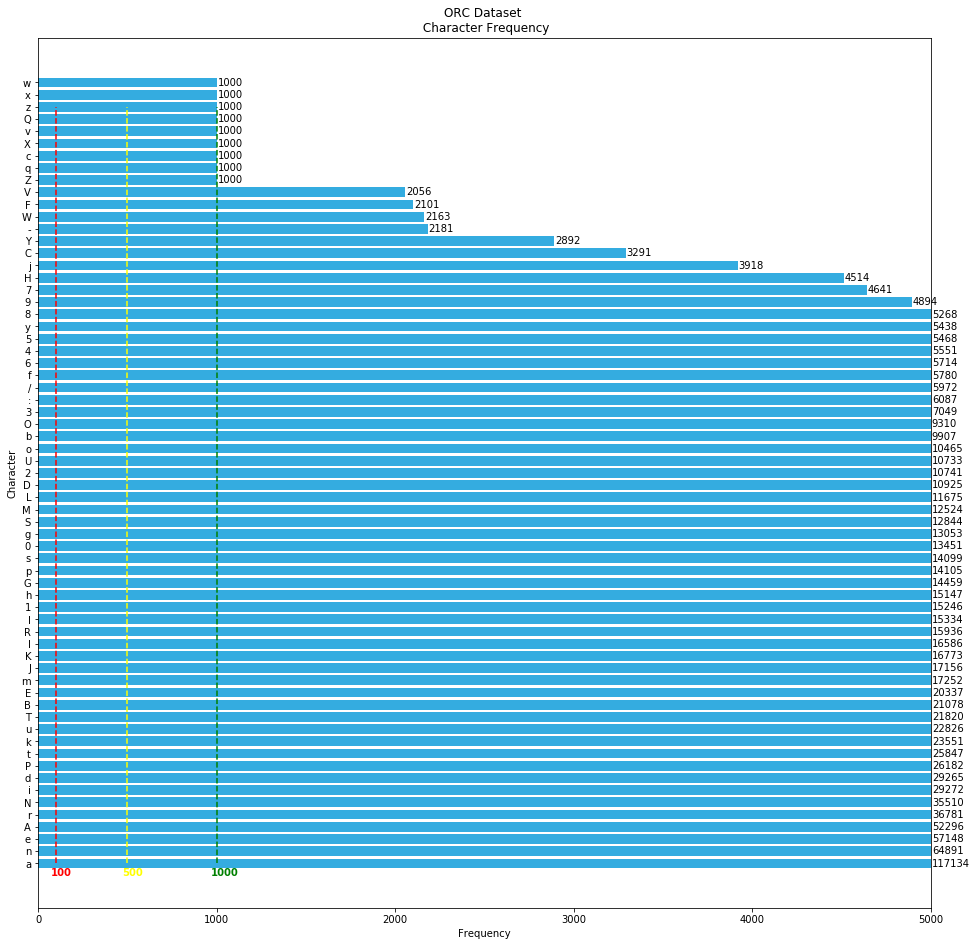

In [16]:
#sampling

MIN_SAMPLE = 1000

sample_symbol_df = symbol_df.copy()

def generate_sample(df):
    sample_df = df.copy()
    target_count = symbol_df.class_id.value_counts().reset_index()
    x = target_count['index'].values
    y = target_count['class_id'].values
    
    print(f"Shape before sampling {sample_df.shape}")
    for label, label_count in zip(x,y):
        if label_count < MIN_SAMPLE:
            sample_cpy = MIN_SAMPLE - label_count
            gen_sample = sample_df[sample_df.class_id == label].sample(n=sample_cpy, replace=True)
            sample_df =sample_df.append(gen_sample)
    sample_df = sample_df.reset_index().drop(['index'], axis=1)
    print(f"Shape after sampling {sample_df.shape}")
    
    return sample_df.copy()

sample_symbol_df = generate_sample(sample_symbol_df)

(x_sample, y_sample) = get_frequency(sample_symbol_df)

plotCharFrequency(x_sample,y_sample)

#### Save Sampled Dataset

In [17]:
sample_symbol_df.to_csv(TEXTAREA_TRAIN_FOLDER+'character_from_text_sampled.csv')

## Balancing data 
  
to avoid bias

In [18]:
min_sample = sample_symbol_df.groupby('class_id').size().min()
min_sample

1000

In [19]:
balanced_df = sample_symbol_df.groupby('class_id')
balanced_df = balanced_df.apply(lambda x: x.sample(min_sample)).reset_index(drop=True)

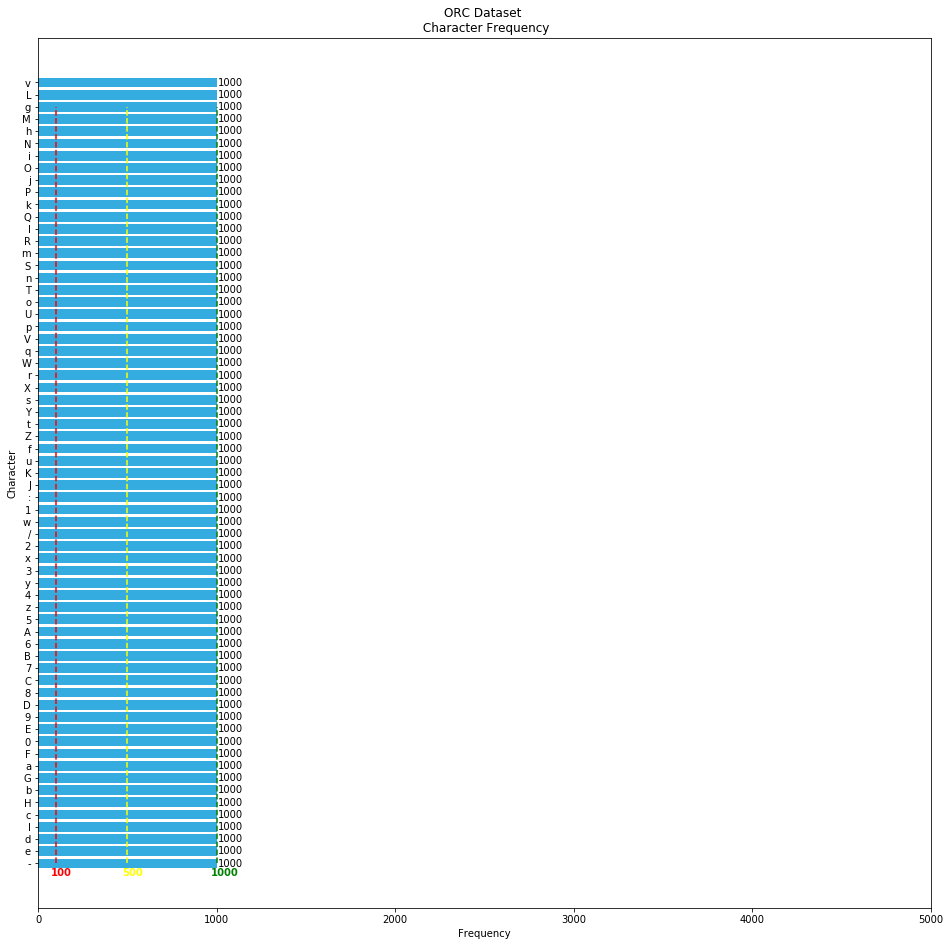

In [21]:
(x_sample, y_sample) = get_frequency(balanced_df)
plotCharFrequency(x_sample,y_sample)

In [22]:
balanced_df.to_csv(TEXTAREA_TRAIN_FOLDER+'character_from_text_balanced.csv')

### Character from image

Shape before sampling (932740, 6)
Shape after sampling (939327, 6)


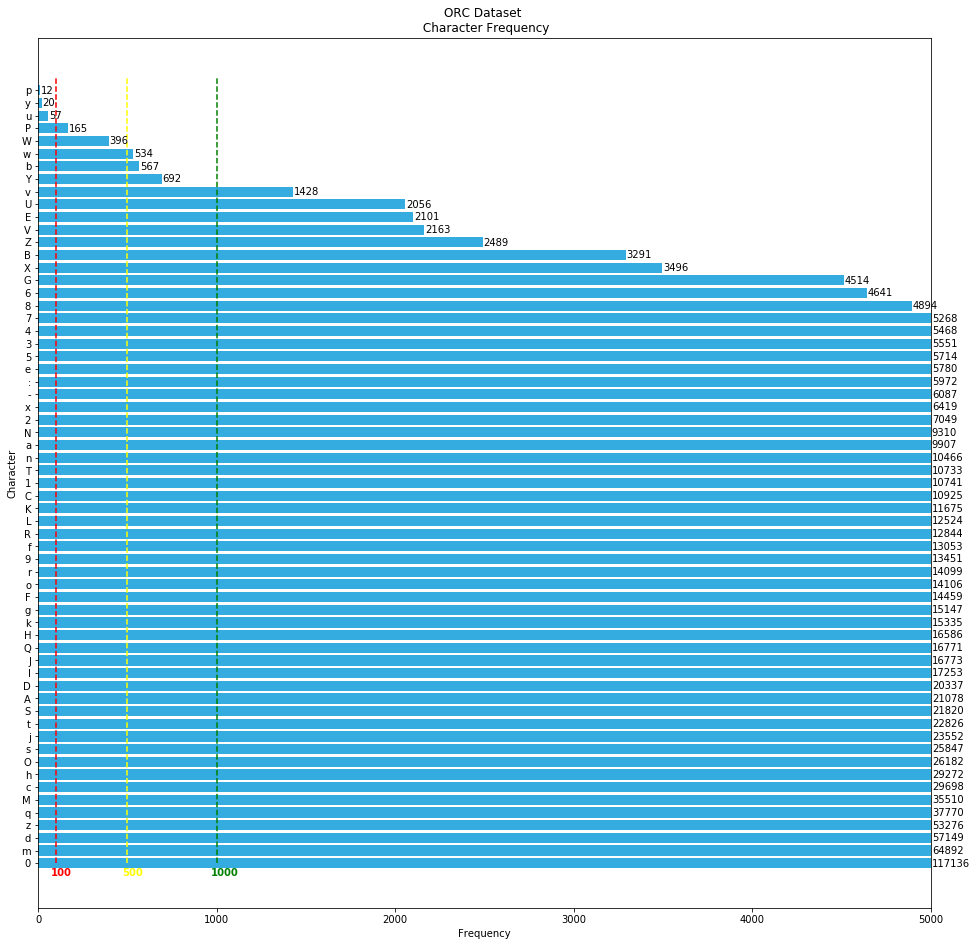

In [23]:
character_df = pd.read_csv(RC_TRAIN_FOLDER+"character.csv")
sample_character_df = generate_sample(character_df)
(x_char, y_char) = get_frequency(sample_character_df)
plotCharFrequency(x_char, y_char)

In [24]:
sample_character_df.to_csv(RC_TRAIN_FOLDER+"character_sampled.csv")

## Text Area Analysis

In [37]:
textarea_df = pd.read_csv(RC_TRAIN_FOLDER+"text.csv")

In [38]:
textarea_df.head()

,image_name,text_image_name,xmin,ymin,xmax,ymax,class_id
0,000aJ162313.jpg,1.jpg,103,82,155,98,1
1,000aJ162313.jpg,2.jpg,354,133,638,183,1
2,000aJ162313.jpg,3.jpg,688,121,1212,179,1
3,000aJ162313.jpg,4.jpg,1262,118,1458,169,1
4,000aJ162313.jpg,5.jpg,1522,114,1858,168,1


In [39]:
print(f"Text areas dataset have {textarea_df.shape[0]} rows and {textarea_df.shape[1]} columns")

Text areas dataset have 170871 rows and 7 columns


In [40]:
textarea_df.image_name.value_counts().reset_index()['index'].values

array(['1a2DQ161055.jpg', '22Ft6171738.jpg', '1CXZJ161447.jpg',
       '1oQbK164941.jpg', '2DwVx143822.jpg', '1feEZ112753.jpg',
       '0sILO153949.jpg', '1D9mO120944.jpg', '1wyQK113059.jpg',
       '25KHa171655.jpg', '0ZdRR115413.jpg', '0TWls111711.jpg',
       '1RGFQ183308.jpg', '1JVXY125443.jpg', '1lvU5192630.jpg',
       '1aj1K173234.jpg', '0PbHj120827.jpg', '194BJ141636.jpg',
       '27P1C171033.jpg', '1xNmK155019.jpg', '0rhAa172839.jpg',
       '0duGa194359.jpg', '0sXqs174430.jpg', '1Q0Z2114336.jpg',
       '0SusN145605.jpg', '1IAK7160657.jpg', '1woiz160337.jpg',
       '1zYAK144706.jpg', '1ExBp135217.jpg', '1gyEJ112657.jpg',
       '1AmSY200534.jpg', '1DxiQ142512.jpg', '0ITYF160531.jpg',
       '09g1g180024.jpg', '05ltI175520.jpg', '1kzsb160109.jpg',
       '2Dyla111117.jpg', '05y6g130830.jpg', '0jsIJ202003.jpg',
       '1K6Kb124542.jpg', '1czx7171507.jpg', '0eCR3194149.jpg',
       '0Er0c162917.jpg', '1x5J7171105.jpg', '0Qlxo125509.jpg',
       '2eUwB123652.jpg', '0Oge3163802.j

In [41]:
tx = textarea_df.image_name.value_counts().reset_index()['index'].values
ty = textarea_df.image_name.value_counts().reset_index()['image_name'].values

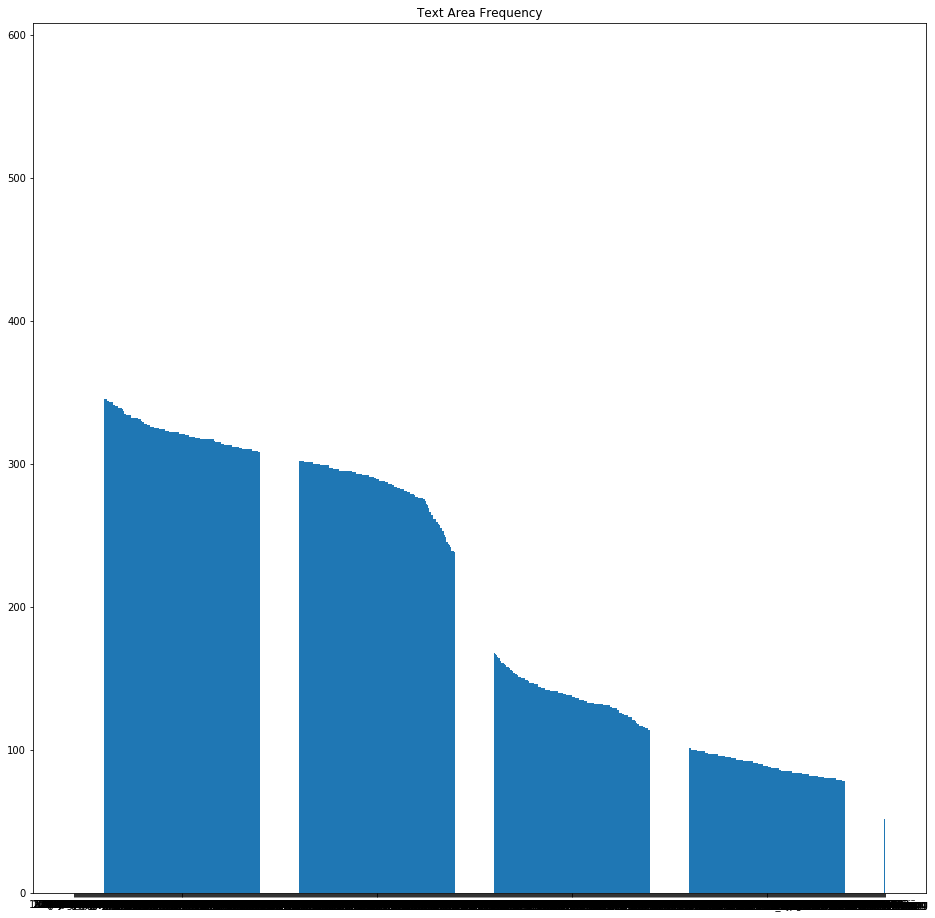

In [42]:
plt.figure(figsize=(16,16))
plt.title("Text Area Frequency")
plt.bar(tx, ty, align='center')

plt.show()